<a href="https://colab.research.google.com/github/PROFESSORRQ/FaceRecognition/blob/main/FaceRecogniton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("data_1.zip", 'r')
zip_ref.extractall()
zip_ref.close()

[[ 35  57 160 160]]


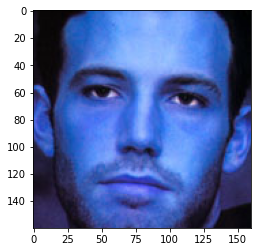

In [ ]:
face_cascade = cv2.CascadeClassifier('haar.xml') #loading the haar.xml file
f = cv2.imread("data/train/ben_afflek/httpwwwallposterscomimagesPostersPFjpg.jpg")
faces = face_cascade.detectMultiScale(f,1.3,5) # applying the classification on image and cropping the face only
print(faces) # printing the values of x, y, width, height
for x,y,w,h in faces:
    plt.imshow(f[y:y+h, x:x+w])  # plotting the image

In [ ]:
face_cascade = cv2.CascadeClassifier('haar.xml')
dirs = "data/train/"
img_size = 60
## train size 
## har ek image per model lga rahe hen
data = []
for name in os.listdir(dirs):
    for f in os.listdir(dirs+name):
        f = cv2.imread(os.path.join(dirs+name, f))
        faces = face_cascade.detectMultiScale(f,1.3,5)
        for x,y,w,h in faces:
            img = f[y:y+h, x:x+w]
            img = cv2.resize(img, (img_size,img_size))
            data.append((img, name))
            
df = pd.DataFrame(data, columns=["image", "name"])
print("Length:",len(df))
df.head()

Length: 99


,image,name
0,"[[[7, 13, 21], [1, 7, 14], [14, 23, 27], [18, ...",ben_afflek
1,"[[[126, 129, 128], [115, 117, 117], [95, 93, 9...",ben_afflek
2,"[[[6, 8, 9], [9, 10, 14], [10, 15, 25], [15, 2...",ben_afflek
3,"[[[57, 51, 50], [76, 70, 71], [43, 38, 38], [4...",ben_afflek
4,"[[[2, 0, 0], [2, 1, 1], [4, 2, 2], [4, 2, 2], ...",ben_afflek


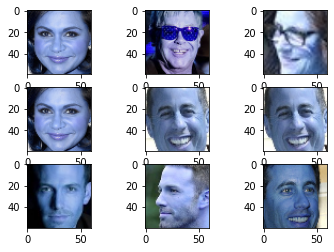

In [ ]:
for i in range(9):
  row = df.iloc[np.random.randint(0, len(df)), :]
  plt.subplot(3,3,i+1)
  plt.imshow(row.image)

In [ ]:

dirs = "data/val/"
## test dataset per ab lga  rahe hen apna cascade classifier
data = []
for name in os.listdir(dirs):
    for f in os.listdir(dirs+name):
        f = cv2.imread(os.path.join(dirs+name, f))
        faces = face_cascade.detectMultiScale(f,1.3,5)
        for x,y,w,h in faces:
            img = f[y:y+h, x:x+w]
            img = cv2.resize(img, (img_size,img_size))
            data.append((img, name))
            
df_test = pd.DataFrame(data, columns=["image", "name"])
print("Test size: ", len(df_test))

Test size:  24


In [ ]:
## Encode target labels with value between 0 and n_classes-1
#This transformer should be used to encode target values, i.e. y, and not the input X
## total 5 logo ke dataset he un paancho ko humne encode kardiya and upe values chahdha di
le = LabelEncoder()
le.fit(df["name"].values)

LabelEncoder()

In [ ]:
# jo values humne train karni he vo nikal li
# usse X_train me daal diya
x_train = list(df.image.values)
x_train = np.array(x_train)
x_train = x_train/255   # divide by 255 isliye kra taako vo 0-1 ke beech me aa jaaie
print(x_train.shape)
print(x_train)
#y_train me jitne total images he vo transform hori he
## BASICALLY TRANSFORM KYA KARTA HE VO, FIT LABEL ENCODE AND RETURN ENCODED LABELS
y_train = le.transform(df["name"].values)
print(y_train.shape)
print(y_train)

(99, 60, 60, 3)
[[[[0.02745098 0.05098039 0.08235294]
   [0.00392157 0.02745098 0.05490196]
   [0.05490196 0.09019608 0.10588235]
   ...
   [0.03921569 0.06666667 0.10588235]
   [0.09411765 0.12156863 0.1372549 ]
   [0.10196078 0.11764706 0.11372549]]

  [[0.03529412 0.07058824 0.10196078]
   [0.01960784 0.05098039 0.07843137]
   [0.05098039 0.07843137 0.09803922]
   ...
   [0.06666667 0.09411765 0.12941176]
   [0.09803922 0.13333333 0.14901961]
   [0.10980392 0.12156863 0.1254902 ]]

  [[0.01960784 0.05098039 0.08235294]
   [0.01176471 0.04705882 0.07058824]
   [0.00784314 0.02745098 0.05098039]
   ...
   [0.11372549 0.14117647 0.16862745]
   [0.10980392 0.12941176 0.1372549 ]
   [0.09803922 0.10980392 0.10196078]]

  ...

  [[0.56078431 0.37647059 0.36470588]
   [0.43921569 0.39607843 0.45882353]
   [0.23137255 0.29803922 0.42352941]
   ...
   [0.14509804 0.12941176 0.0627451 ]
   [0.11764706 0.10588235 0.05098039]
   [0.10980392 0.09803922 0.05098039]]

  [[0.70196078 0.42745098 0.3

In [ ]:
# same humne test vaali values per bhi kardiya

x_test = list(df_test.image.values)
x_test = np.array(x_test)
x_test = x_test/255
print(x_test.shape)

y_test = le.transform(df_test["name"].values)
print(y_test.shape)

(24, 60, 60, 3)
(24,)


In [ ]:
## kitne unique bande hen hamare dataset me vo print kar diya
people_num = len(np.unique(y_train))
people_num

5

In [ ]:
## we ha eto minimize the differnence between positive and negative

def triplet_loss(y_true, y_pred, alpha = 0.2):
    print(y_pred)
    total_lenght = y_pred.shape.as_list()[-1]
    anchor, positive, negative = y_pred[:,:int(1/3*total_lenght)], y_pred[:,int(1/3*total_lenght):int(2/3*total_lenght)], y_pred[:,int(2/3*total_lenght):]
    
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)   # distance between anchor and postive 
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)   # distance between anchor and negative
    basic_loss = pos_dist - neg_dist + alpha
    loss = tf.reduce_sum(tf.maximum(basic_loss,0.0))
    return loss

In [ ]:
## |encoding(anchor)-encding(positive)|^2  <=    encoding(anchor)-encding(negative)|^2
 ##             d(A,P)                                         d(A,N)
 ## d is distnace function
 ## choose triplet that are hard to train 
 ## during training if A,P,N are chosen randomly then
 ## d(A,P)+ alpha <=d(A,N) is easily statisfied
def generate_triplets(x, y, num_same = 4, num_diff = 4):
    anchor_images = np.array([]).reshape((-1,)+ x.shape[1:])
    same_images = np.array([]).reshape((-1,)+ x.shape[1:])
    diff_images = np.array([]).reshape((-1,)+ x.shape[1:])
    
    for i in range(len(y)):
        point = y[i]        
        anchor = x[i]
        
        same_pairs = np.where(y == point)[0]
        same_pairs = np.delete(same_pairs , np.where(same_pairs == i))
        diff_pairs = np.where(y != point)[0]
               
        same = x[np.random.choice(same_pairs,num_same)]
        diff = x[np.random.choice(diff_pairs,num_diff)]
        
        anchor_images = np.concatenate((anchor_images, np.tile(anchor, (num_same * num_diff, 1, 1, 1) )), axis = 0)
                                       
        for s in same:
            same_images = np.concatenate((same_images, np.tile(s, (num_same, 1, 1, 1) )), axis = 0)
            
        diff_images = np.concatenate((diff_images, np.tile(diff, (num_diff, 1, 1, 1) )), axis = 0)
        
    return anchor_images, same_images, diff_images

In [ ]:
anchor_images, same_images, diff_images = generate_triplets(x_train,y_train, num_same= 10, num_diff=10)
print(anchor_images.shape, same_images.shape, diff_images.shape)

(9900, 60, 60, 3) (9900, 60, 60, 3) (9900, 60, 60, 3)


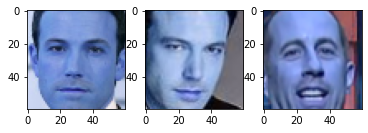

In [ ]:
idx = 999
plt.subplot(1,3,1)
plt.imshow(anchor_images[idx])

plt.subplot(1,3,2)
plt.imshow(same_images[idx])

plt.subplot(1,3,3)
plt.imshow(diff_images[idx])

In [ ]:
# It will generate 64 filters and multiply each of the accross the images
# and each will epoch will see which layer/filter is better and will memorize the parameter which is best suited for it for future purpose 
# hum kitne bhi layers lga sakte hen ... basically layers laagake hum apni
# image ko divide kar rahe hen several several parts me ..
# sequential model is linear stack of layers 
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=(img_size,img_size,3), activation='relu'))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=1, strides=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.Flatten())
#dense layer is making our decision boundary 
## it is takin saomme input and spitting out 512 dimensional vector
##overfiitting se bacahne ke liye dropout
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128))
              
    model.summary()
    return model

In [ ]:

anchor_input = tf.keras.layers.Input((img_size, img_size, 3), name='anchor_input')
positive_input = tf.keras.layers.Input((img_size, img_size, 3), name='positive_input')
negative_input = tf.keras.layers.Input((img_size, img_size, 3), name='negative_input')

shared_dnn = get_model()

encoded_anchor = shared_dnn(anchor_input)
encoded_positive = shared_dnn(positive_input)
encoded_negative = shared_dnn(negative_input)

merged_vector = tf.keras.layers.concatenate([encoded_anchor, encoded_positive, encoded_negative],
                                            axis=-1, name='merged_layer')

model = tf.keras.Model(inputs=[anchor_input,positive_input, negative_input], outputs=merged_vector)
model.summary()
model.compile(loss=triplet_loss, optimizer="adam")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [ ]:

weight_dir = "weight_tripletloss_model"
if not os.path.exists(weight_dir):
    os.mkdir(weight_dir)
    
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_dir+'/checkpoint-{epoch:02d}.hdf5')

In [ ]:
Y_dummy = np.empty((anchor_images.shape[0],1))

model.fit([anchor_images,same_images,diff_images],y=Y_dummy, batch_size=128, epochs=10, callbacks=[checkpoint])

Epoch 1/10
78/78 [==============================] - 3s 41ms/step - loss: 0.1418
Epoch 2/10
78/78 [==============================] - 3s 40ms/step - loss: 0.2058
Epoch 3/10
78/78 [==============================] - 3s 41ms/step - loss: 0.5221
Epoch 4/10
78/78 [==============================] - 3s 41ms/step - loss: 0.0383
Epoch 5/10
78/78 [==============================] - 3s 41ms/step - loss: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 3s 41ms/step - loss: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 3s 41ms/step - loss: 8.3479e-04
Epoch 8/10
78/78 [==============================] - 3s 41ms/step - loss: 0.0000e+00
Epoch 9/10
78/78 [==============================] - 3s 41ms/step - loss: 0.0000e+00
Epoch 10/10
78/78 [==============================] - 3s 41ms/step - loss: 0.0000e+00


In [ ]:
#given a new name to our model
anchor_model = tf.keras.Model(inputs = anchor_input, outputs=encoded_anchor)

In [ ]:
print(anchor_model)

In [ ]:
pred = anchor_model.predict(x_train)
pred.shape

(99, 128)

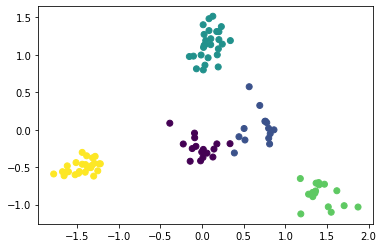

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#coverts to 2 coloumn 
pred_pca = pca.fit_transform(pred)

plt.scatter(pred_pca[:,0], pred_pca[:,1], c=y_train)
#c=train -> color kis bassis per karna he
# different clusters are representing 5 different classes

In [ ]:
# Encode the given test image 
def encode_image(model ,img):
    encode = model.predict(img.reshape((1,)+ img.shape))
    return encode

In [ ]:
#calculating the distance for KNN classification
def dist_imgs(anchor_enc, img_enc):
    return np.linalg.norm(img_enc - anchor_enc)

In [ ]:
print(df.head())

                                               image        name
0  [[[7, 13, 21], [1, 7, 14], [14, 23, 27], [18, ...  ben_afflek
1  [[[126, 129, 128], [115, 117, 117], [95, 93, 9...  ben_afflek
2  [[[6, 8, 9], [9, 10, 14], [10, 15, 25], [15, 2...  ben_afflek
3  [[[57, 51, 50], [76, 70, 71], [43, 38, 38], [4...  ben_afflek
4  [[[2, 0, 0], [2, 1, 1], [4, 2, 2], [4, 2, 2], ...  ben_afflek


In [ ]:
name_dict = {}
for i in set(df["name"].values):
    z = df[df["name"] == i].image
    img = np.array(list(z))/255
    enc = np.zeros((1,128))
    for j in range(len(z)):
        enc += encode_image(anchor_model,img[j])

    enc = enc/len(z)
    name_dict[i] = enc

In [ ]:
#predicte the image 
def predict_image(model, img, dictionary):
    enc = encode_image(model, img)
    max_dist = 10000000
    max_name = None
    for name in dictionary:
        dist = dist_imgs(dictionary[name], enc)
        if max_dist > dist:
            max_dist = dist
            max_name = name
    
    return max_name, max_dist

In [ ]:
pred_x_train = anchor_model.predict(x_train)

In [ ]:
## applied KNN classifier to our x_train and y_train
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(pred_x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Predicted name: ['jerry_seinfeld']
Actual pred:  ['jerry_seinfeld']
[[ 0.05030342 -0.0599821  -0.09538541 -0.12094209 -0.02472036 -0.16835563
  -0.01667565 -0.05373732 -0.15972246  0.14171086 -0.06691255 -0.06346537
  -0.10379172 -0.02715359 -0.27967456  0.06519248  0.12178779 -0.19543818
   0.10660622  0.13453686  0.09158448  0.08558342 -0.0230323  -0.07245336
   0.05056223  0.00869097  0.01131144 -0.21817602  0.07307863 -0.2369625
   0.08160757 -0.00726534  0.10389692 -0.00854358  0.03586476  0.26301667
  -0.10633168  0.20987116 -0.07184411  0.03689705 -0.12635626  0.10264067
  -0.01986878 -0.07180363  0.1126459  -0.32541302  0.2693879  -0.18738551
  -0.0491534   0.35238764  0.10274391  0.01173508 -0.01225249 -0.02780584
   0.1174626  -0.15896396 -0.00514184 -0.03706662  0.04279509 -0.15170662
   0.12563421 -0.12939604 -0.17085582 -0.00541957  0.1967298   0.10760764
   0.1227374   0.1436115   0.0658436  -0.12509778 -0.05055874  0.01944584
   0.01321398  0.03850464  0.19594404 -0.0026

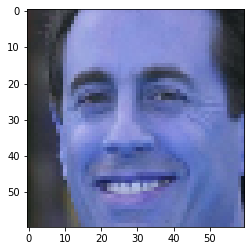

In [ ]:
#testing started 
idx = 16
img = x_test[idx]
plt.imshow(img)

enc = encode_image(anchor_model, img)
pred = neigh.predict(enc)
print("Predicted name:",le.inverse_transform(pred))
print("Actual pred: ", le.inverse_transform(y_test[idx:idx+1]))
print(enc)

Predicted name: ['jerry_seinfeld']
Actual pred:  ['jerry_seinfeld']
[[ 5.39982766e-02 -7.78509453e-02 -7.50538260e-02 -1.15581505e-01
  -1.67682488e-02 -1.72284886e-01 -3.79089899e-02 -5.47313653e-02
  -1.64135873e-01  1.21630773e-01 -2.29186080e-02 -7.11367205e-02
  -8.79773349e-02 -3.81256863e-02 -2.71366894e-01  8.32606703e-02
   1.13833070e-01 -2.06817880e-01  1.47196859e-01  1.41567245e-01
   7.08052963e-02  5.45190647e-02 -2.01149508e-02 -6.12774305e-02
   7.92029202e-02  3.55651155e-02  5.19007370e-02 -2.22628012e-01
   8.70922729e-02 -2.38414139e-01  5.42617403e-02 -2.21863184e-02
   7.98281953e-02  4.22782032e-04  4.41475660e-02  2.54747659e-01
  -1.17049605e-01  2.31792942e-01 -9.02199224e-02  4.84724017e-03
  -1.57109395e-01  9.73943844e-02 -1.29546179e-02 -5.14730439e-02
   1.16822541e-01 -3.10745388e-01  2.58542925e-01 -2.11311296e-01
  -1.87506452e-02  3.70191574e-01  1.17917143e-01 -1.30337784e-02
  -1.72419120e-02  7.51659088e-03  1.65259525e-01 -1.75677538e-01
  -1.033

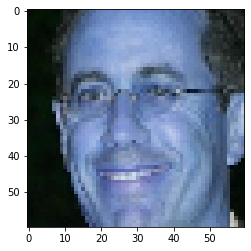

In [ ]:

idx = 17
img = x_test[idx]
plt.imshow(img)

enc = encode_image(anchor_model, img)
pred = neigh.predict(enc)
print("Predicted name:",le.inverse_transform(pred))
print("Actual pred: ", le.inverse_transform(y_test[idx:idx+1]))
print(enc)

Predicted name: ['mindy_kaling']
Actual pred:  ['mindy_kaling']
[[ 0.13110931  0.04386327 -0.11161875  0.02787619  0.05334307  0.05393217
  -0.31687587  0.01951302 -0.13572414 -0.16721545 -0.15429476  0.01444241
   0.16400427  0.08326196  0.06416968  0.3118275  -0.35327005 -0.0577362
  -0.02014809 -0.01626084  0.0566087   0.22684155  0.106806    0.23707649
   0.16680901 -0.15467185  0.04298722  0.0202317   0.31670555  0.1357738
  -0.02038846 -0.03243598 -0.09944776  0.16255432  0.24460751  0.16102569
   0.10597105 -0.05261359 -0.25090736  0.27980164  0.2962722   0.05016136
   0.15370621  0.07814828 -0.22883995  0.26496089 -0.11051592  0.28052086
  -0.06580734  0.05421455 -0.25680852 -0.23595613  0.17136517  0.07542005
  -0.04806747 -0.23968251  0.08397229 -0.20240025 -0.19233525 -0.07108334
  -0.22286278  0.17781481  0.30740643 -0.00843288  0.22395478  0.07158694
   0.24082123 -0.11785071 -0.08273479  0.05673648  0.22289217  0.3223229
   0.19398241 -0.2813395   0.22361407 -0.25160939  

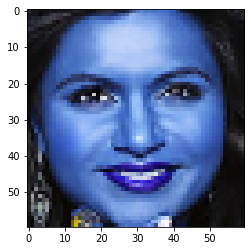

In [ ]:
idx = 7
img = x_test[idx]
plt.imshow(img)

enc = encode_image(anchor_model, img)
pred = neigh.predict(enc)
print("Predicted name:",le.inverse_transform(pred))
print("Actual pred: ", le.inverse_transform(y_test[idx:idx+1]))
print(enc)

In [ ]:
pred_x_test = anchor_model.predict(x_test)
pred = neigh.predict(pred_x_test)

print(np.sum(pred == y_test)/len(pred))

1.0
